In [2]:
%cd C:\Users\itaye\Desktop\pdexplain\pd-explain\src

C:\Users\itaye\Desktop\pdexplain\pd-explain\src


C:\Users\itaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [1]:
#%cd C:\Users\itaye\Desktop\pdexplain\pd-explain\src
%cd C:\Users\User\Desktop\pd_explain_test\pd-explain\src

[WinError 3] The system cannot find the path specified: 'C:\\Users\\User\\Desktop\\pd_explain_test\\pd-explain\\src'
c:\Users\itaye\Desktop\pdexplain\pd-explain\Examples\Notebooks


C:\Users\itaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
import pandas as pd
import pd_explain

C:\Users\itaye\AppData\Local\Temp\ipykernel_24188\2046952530.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


usetex-False


In [4]:
spotify_all = (pd.read_csv(r"C:\Users\itaye\Desktop\pdexplain\pd-explain\Examples\Datasets\spotify_all.csv"))
# spotify_all = (pd.read_csv(r"C:\Users\User\Desktop\pd_explain_test\pd-explain\Examples\Datasets\spotify_all.csv"))

replace to $$


AttributeError: 'int' object has no attribute 'replace'

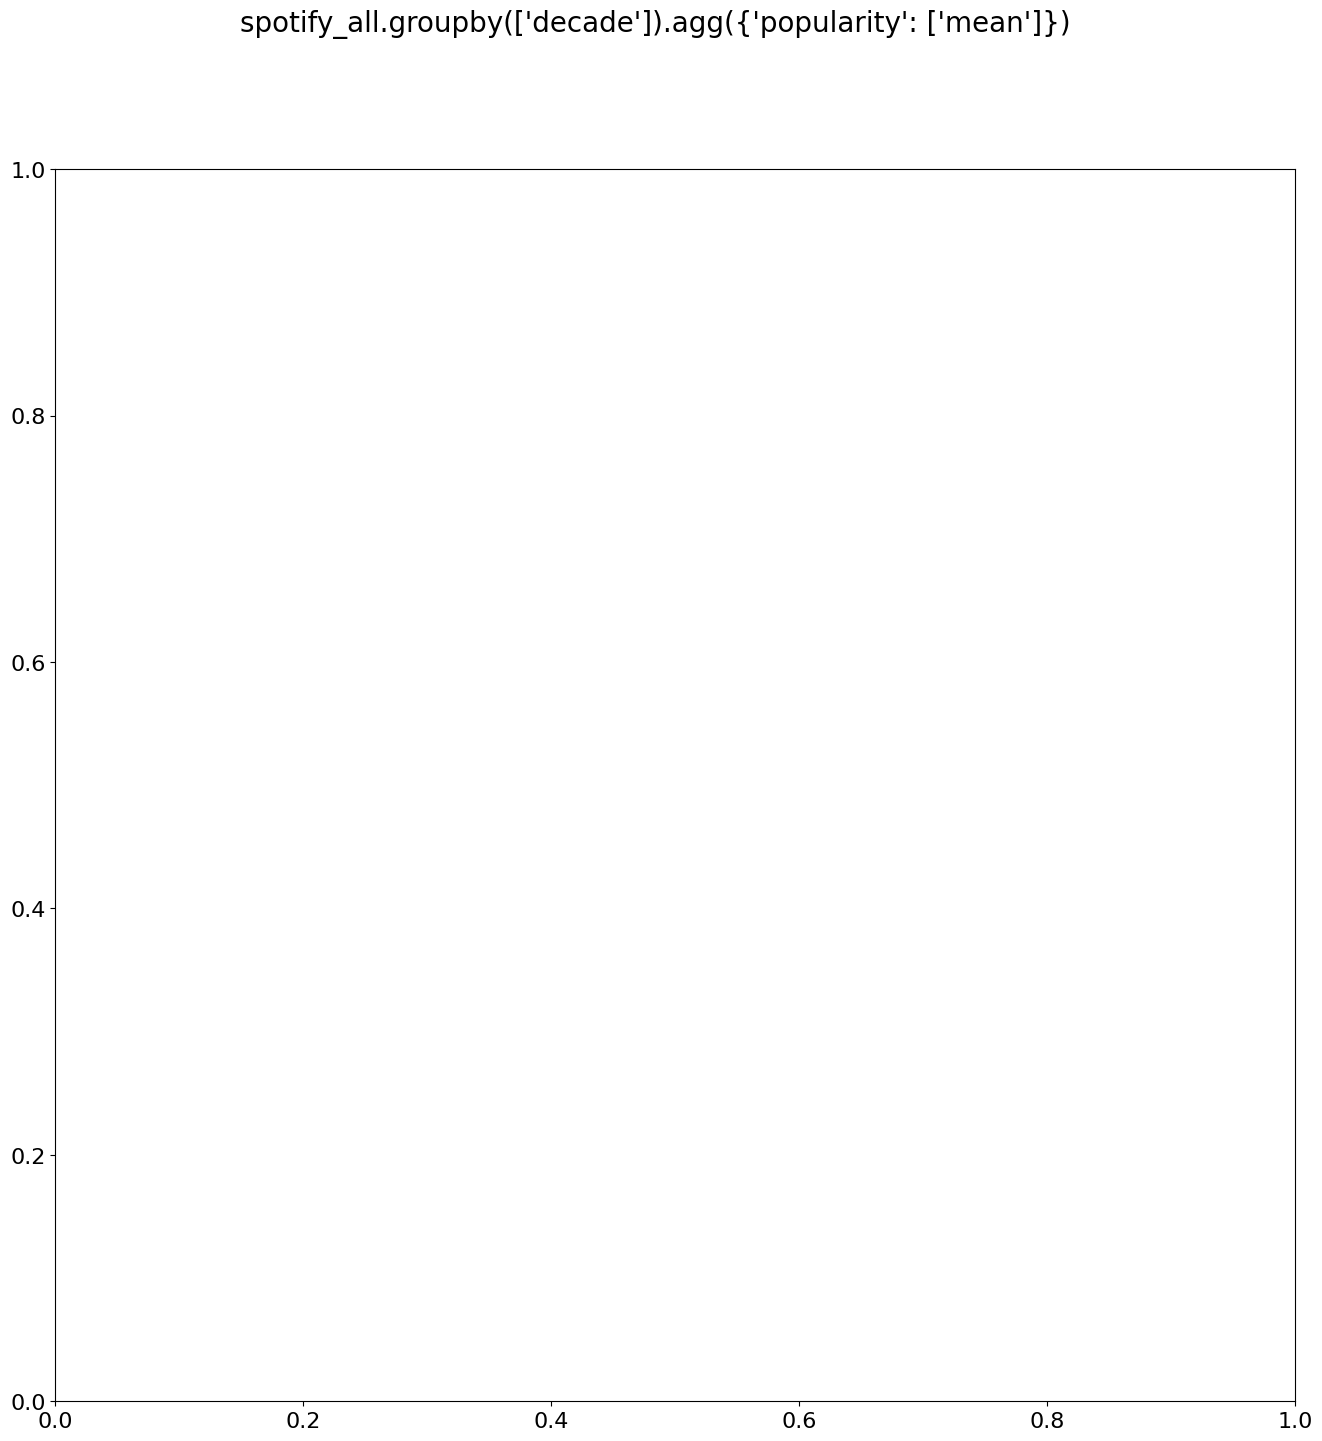

In [8]:
# decades = (spotify_all[(spotify_all.decade >= 1940) & (spotify_all.decade < 2020)])['decade'].value_counts().sort_values()
decades = spotify_all.groupby(['decade']).popularity.mean()
decades.explain()
# decades = decades/decades.sum()
# decades_nomax = decades.values[0:-1]
# score = 1 - decades_nomax.mean() / decades.mean()
# score

In [47]:
popular_decades = spotify_all[spotify_all.popularity > 65]['decade'].value_counts().sort_values()
popular_decades = popular_decades/popular_decades.sum()
popular_decades_nomax = popular_decades.values[0:-1]
score = 1 - popular_decades_nomax.mean() / popular_decades.mean()
score

0.46001272804412385

<Axes: xlabel='decade', ylabel='probability'>

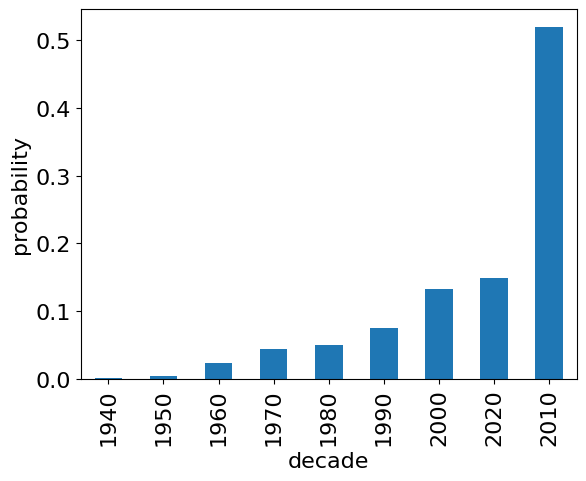

In [49]:
popular_decades.plot(kind='bar', ylabel='probability')

<Axes: xlabel='decade', ylabel='probability'>

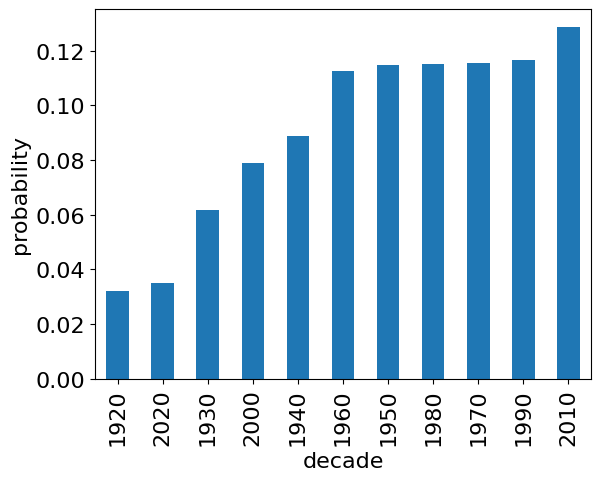

In [50]:
decades.plot(kind='bar', ylabel='probability')

In [4]:
spotify_all['main_artist'] = spotify_all['main_artist'].replace({'\$': ''}, regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\itaye\AppData\Local\Temp\ipykernel_11804\3448523466.py:1: SyntaxWarning: invalid escape sequence '\$'
  spotify_all['main_artist'] = spotify_all['main_artist'].replace({'\$': ''}, regex=True)


replace to $$


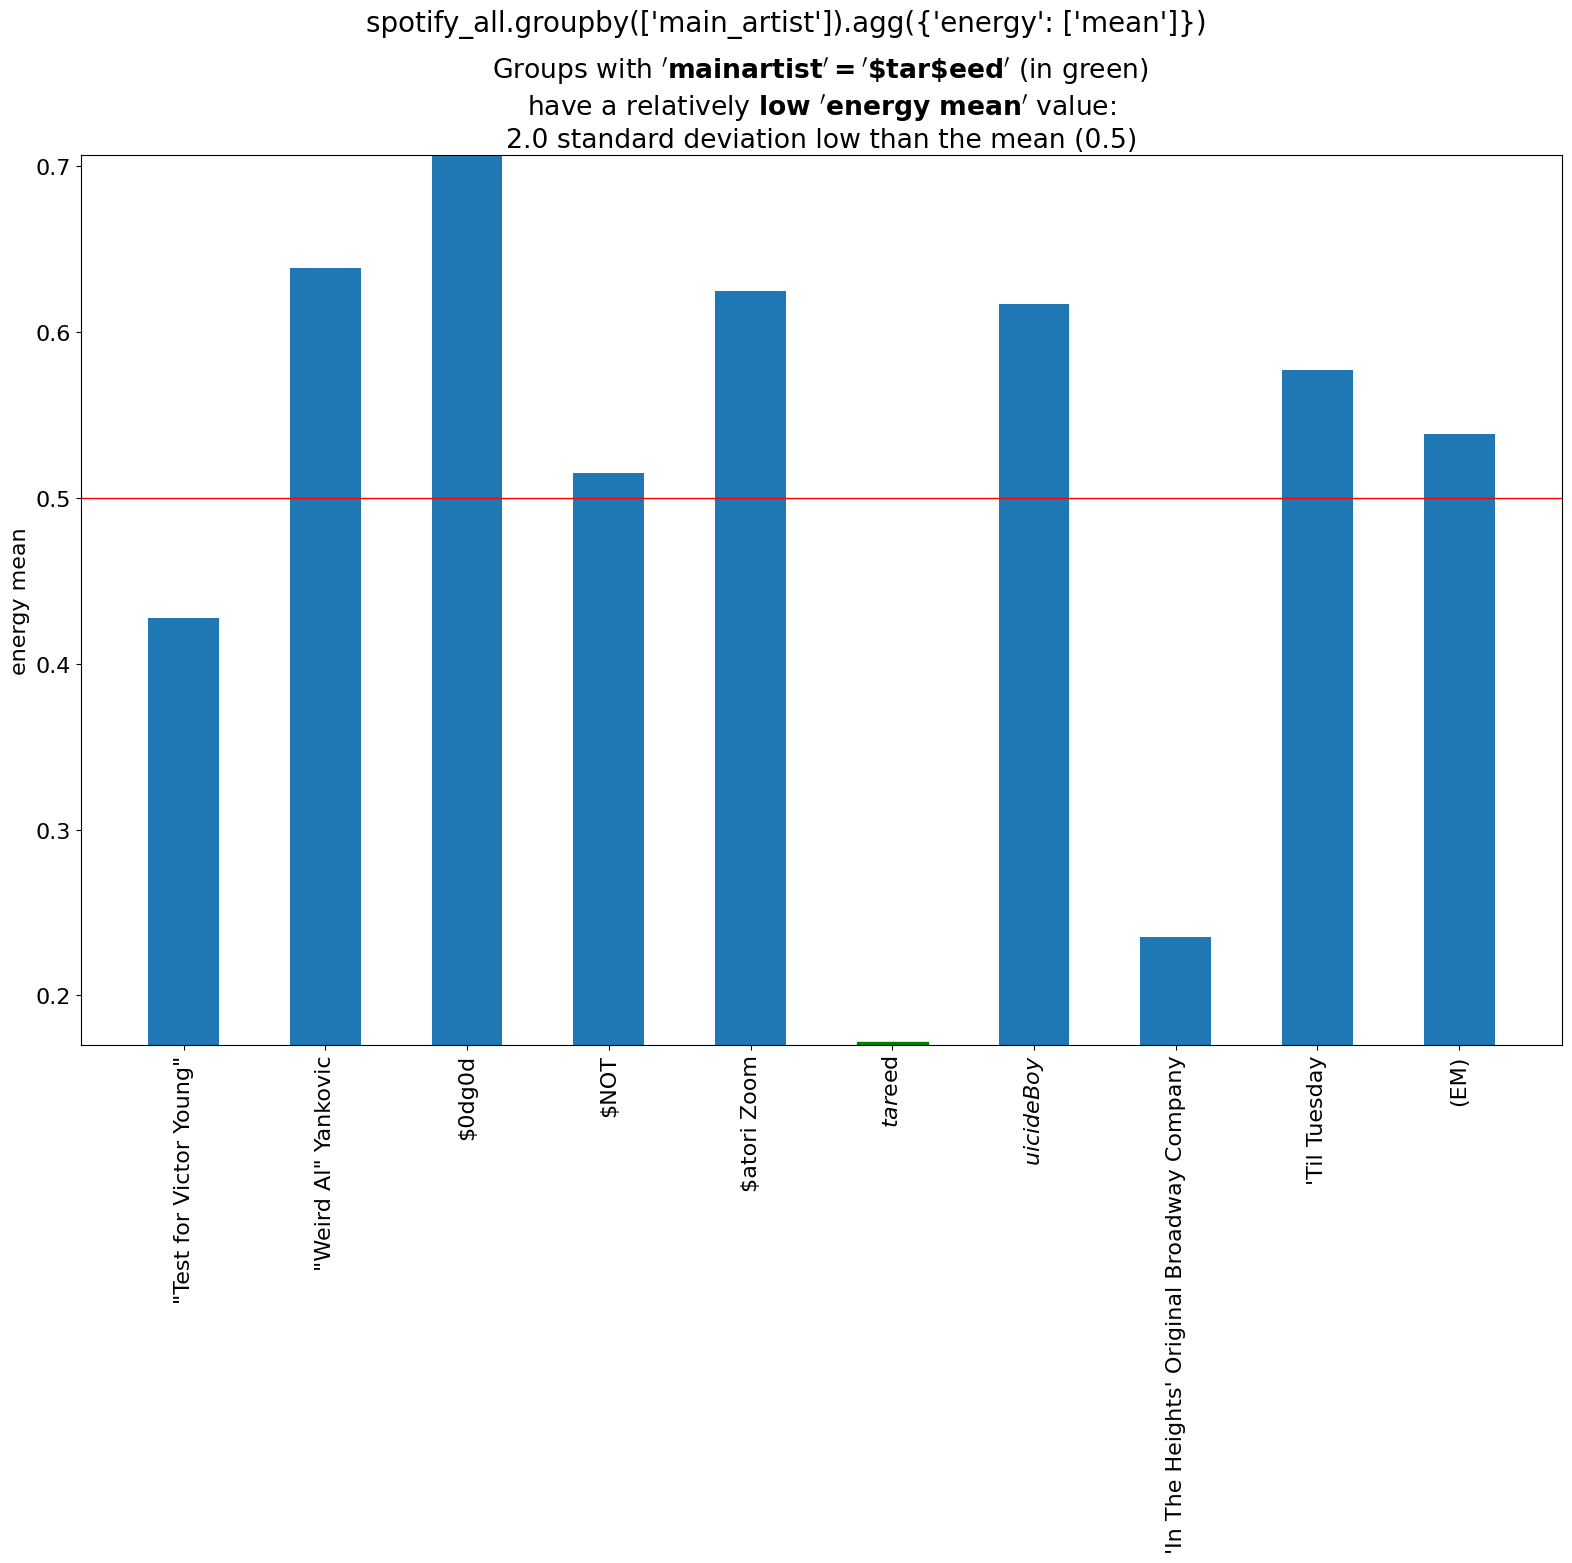

In [4]:
grouped3 = spotify_all.groupby(['main_artist'])['energy'].mean()

grouped3.explain()